In [ ]:
# Titanic Survival Prediction using decision tree classifier

In [21]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

In [22]:
# Import train and test datasets
train = pd.read_csv('datasets/titanic/train.csv')
test = pd.read_csv('datasets/titanic/test.csv')

# View first lines of training data
print (train.info())
train.head(n=5)

# View first lines of testing data
print (test.info())
test.head(n=5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [23]:
# test set
# Check for Null Values
test['Sex'].isnull().sum()
test['Pclass'].isnull().sum()
test['Fare'].isnull().sum()

# Fill the Null value with the median
test['Fare']=test['Fare'].fillna(test['Fare'].median())

test['Fare'].isnull().sum()

# Check for Null Value
test['Age'].isnull().sum()

# Fill the Null value with the median
test['Age']=test['Age'].fillna(test['Age'].median())

test['Age'].isnull().sum()

0

In [24]:
# train set
# Check for Null Values
train['Sex'].isnull().sum()
train['Pclass'].isnull().sum()
train['Fare'].isnull().sum()
train['Age'].isnull().sum()

# Fill the Null value with the median
train['Age']=train['Age'].fillna(train['Age'].median())

train['Age'].isnull().sum()

0

In [25]:
# Initialize a dictionary to mark male as 0 and female as 1
d={'male':0,'female':1}

# apply dictionary to the column 'Sex'
test['Sex']=test['Sex'].apply(lambda x:d[x])
train['Sex']=train['Sex'].apply(lambda x:d[x])

test['Sex'].head()

0    0
1    1
2    0
3    0
4    1
Name: Sex, dtype: int64

In [26]:
target_column=['Survived']

test_columns=['PassengerId','Age','Pclass','Sex','Fare']

train_X=train[test_columns]
train_Y=train[target_column]

# Prediction 1 - Plclass = 1 (First Class Passengers) are survived
test['Survived'] = test.Pclass == 1
# Prediction 2 - Women are survived
test['Survived'] = test.Sex == 1

test_X=test[test_columns]
test_Y=test[target_column]

In [27]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(train_X,train_Y)

y_pred = classifier.predict(train_X)
print ("Accuracy on Training: ",classifier.score(train_X,train_Y))

classifier.fit(test_X,test_Y)
y_pred = classifier.predict(test_X)
print ("Accuracy on Testing: ",classifier.score(test_X,test_Y))

Accuracy on Training:  0.82379349046
Accuracy on Testing:  1.0


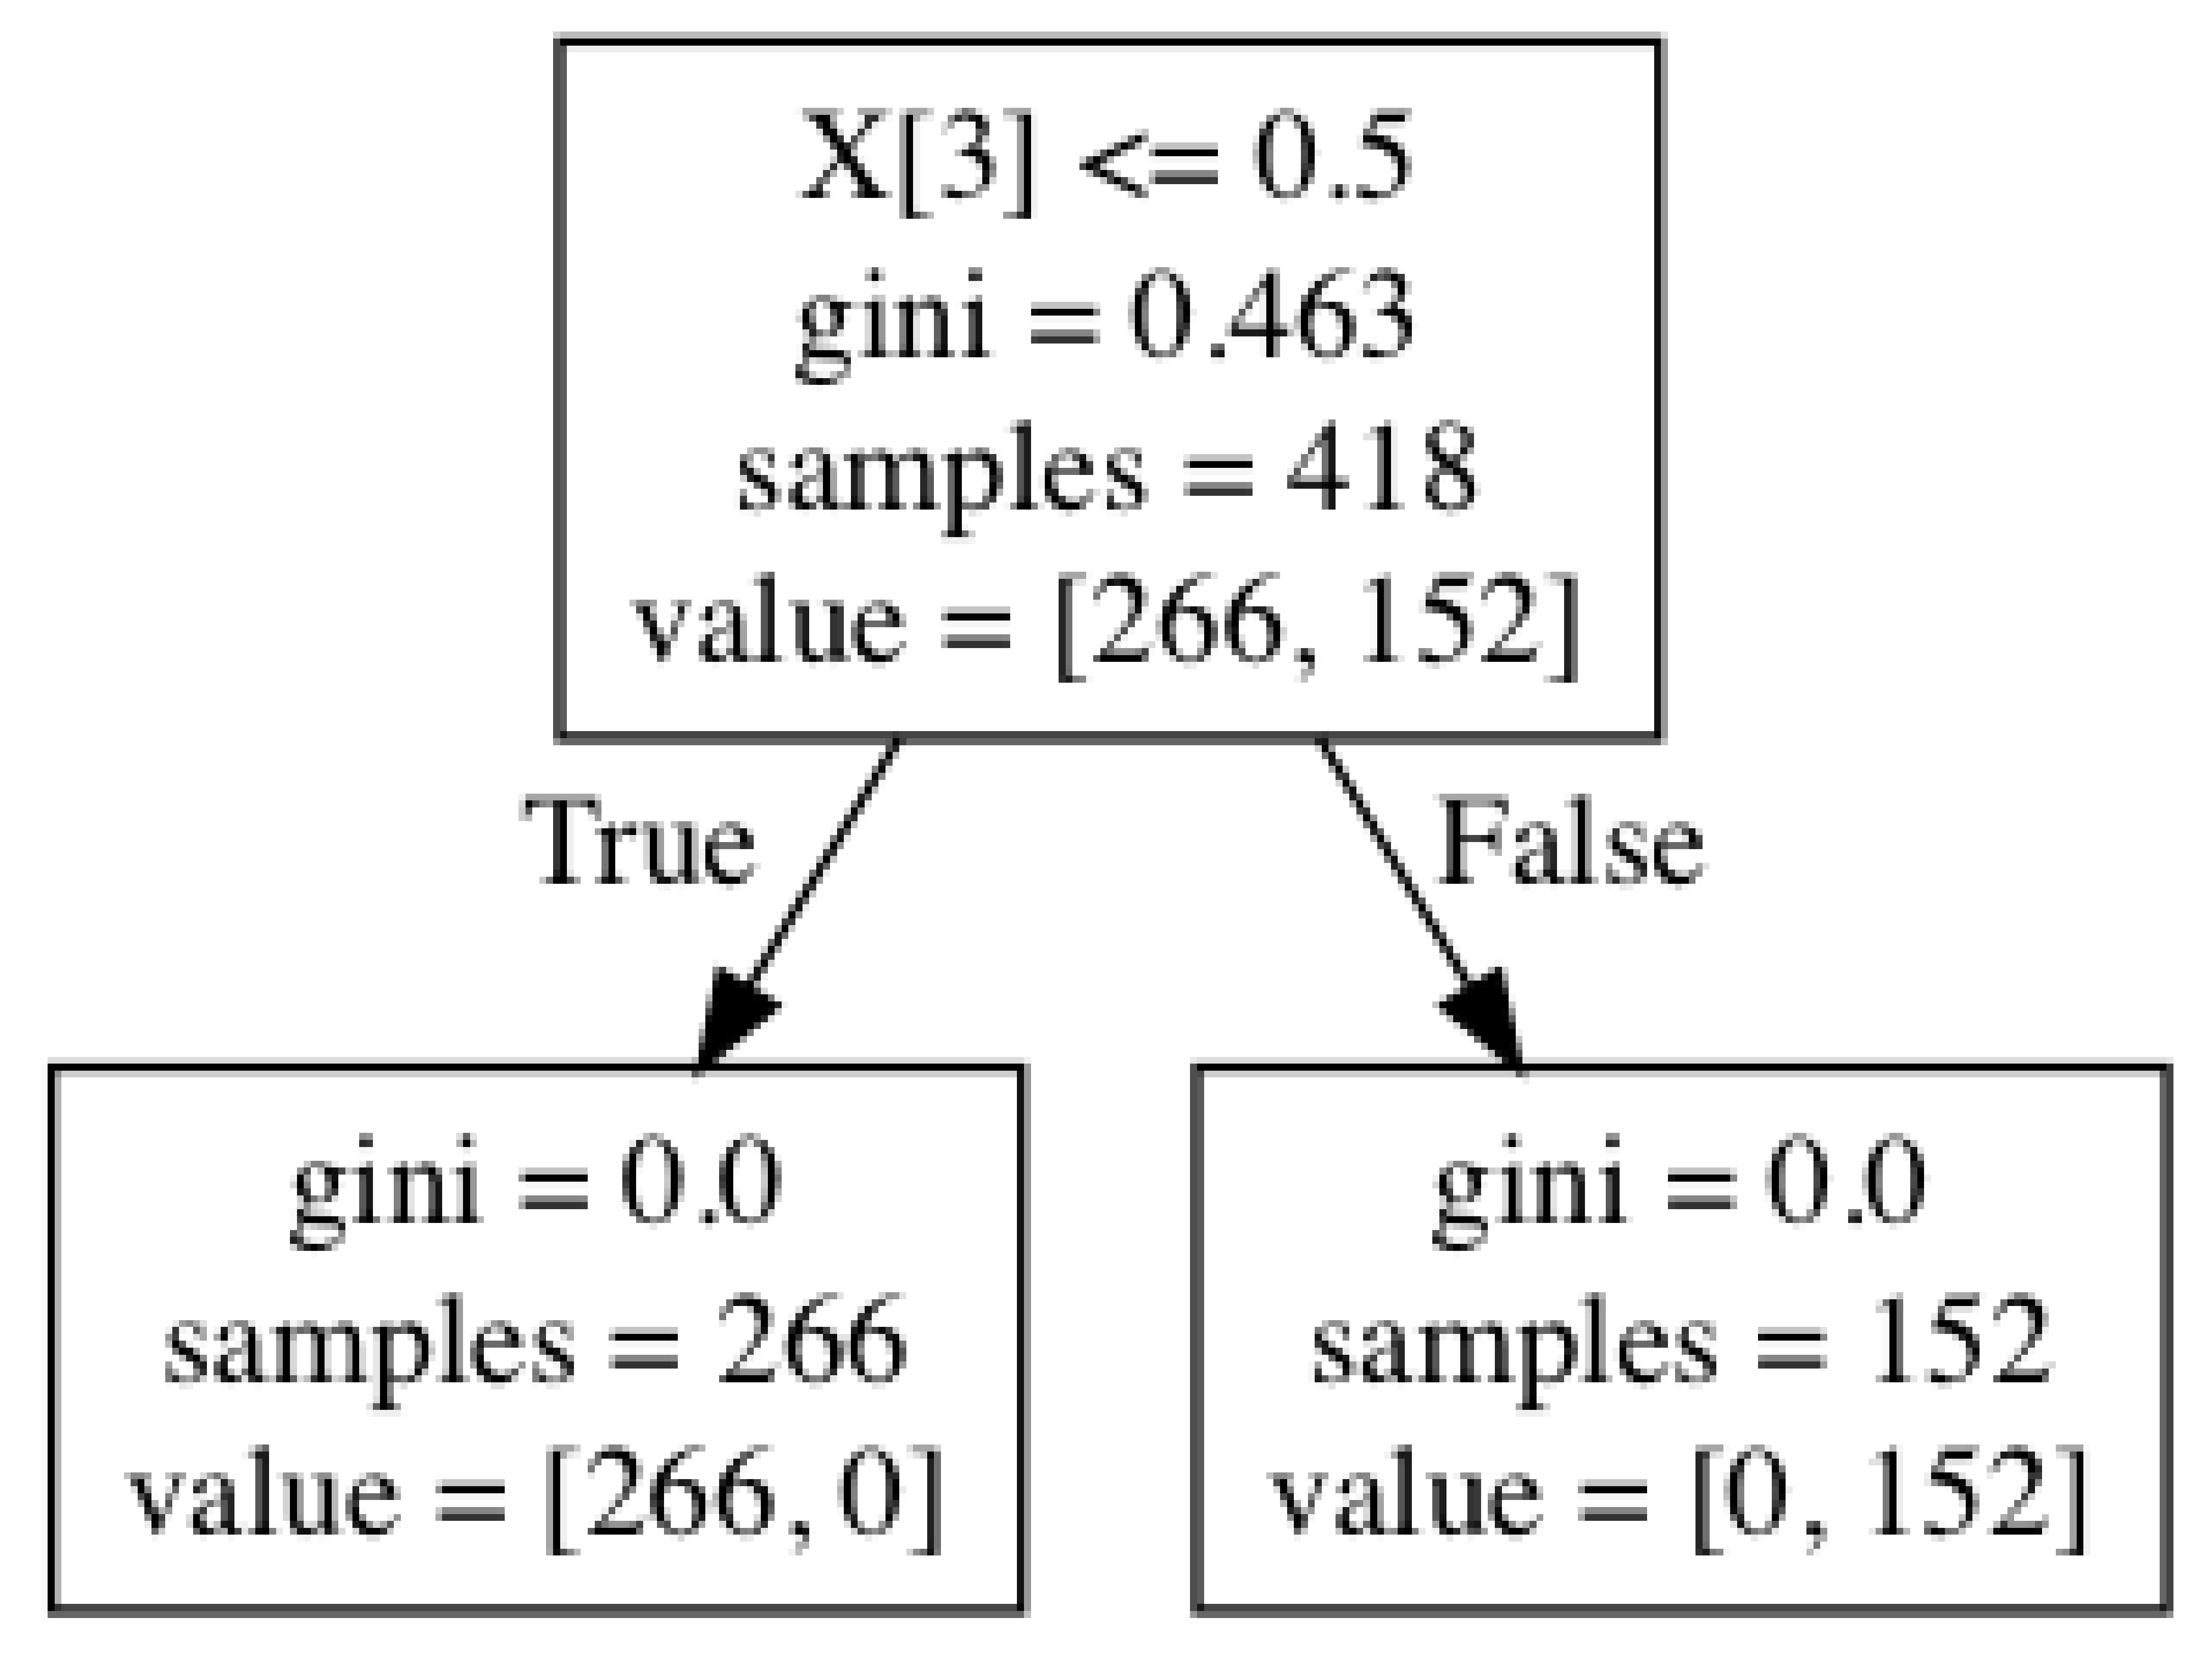

In [28]:
from io import StringIO
from sklearn import tree
#from graphviz import *

import matplotlib.image as mpimg
import pydotplus

dotfile = open("dtree.dot", 'w')
tree.export_graphviz(classifier, out_file = dotfile)
dotfile.close()
dot_data = StringIO()
tree.export_graphviz(classifier, out_file=dot_data)
graph = pydotplus.graph_from_dot_file("dtree.dot")
graph.write_png('test.png')
img=mpimg.imread('test.png')
fig = plt.figure(figsize=(100, 100)) 
plt.axis("off")
plt.imshow(img, cmap = plt.cm.binary,
           interpolation="nearest")
plt.show()